[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  

/Users/Jan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


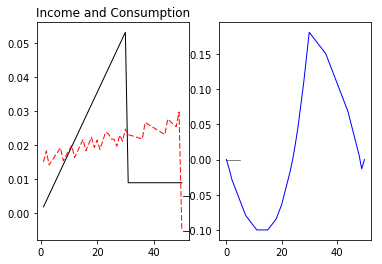

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Deterministic Value Function Iteration
# Greg Kaplan 2017
# Coded by Brandon Kaplowitz

def main():

    ## Parameters

    # horizon
    T= 5#0

    # preferences
    risk_aver = 2
    beta = .97

    # returns
    r = .05
    R = 1+ r

    # income
    y =  np.zeros(T)
    y[0:30] = range(1,31)
    y[31:50] = 5

    #rescale income so that average income = 1
    y= y/sum(y)

    # asset grid
    na = 1000
    amax = 5
    #borrow_lim = 0
    borrow_lim = -.1
    agrid_par =1 # 1 for linear, 0 for l-shaped


    ## Options
    Display = 1
    DoSimulate = 1
    MakePlots =1

    ## Set Up Grids

    # assets
    agrid = np.linspace(0,1,na).transpose()
    agrid = agrid**(1/agrid_par)
    agrid = borrow_lim + (amax-borrow_lim)*agrid

    #put explicit point at a=0
    agrid[np.argmin(abs(agrid-0))] = 0

    ## Utility Function

    if risk_aver==1:
        u = lambda c: np.log(c)
        # lambda here is equivalent to '@' in matlab and refers to lambda calculus to define a base function.
    else:
        u = lambda c: (c ** (1 - risk_aver) - 1) / (1 - risk_aver)
    u1 = lambda c: c ** (-risk_aver)

    ## Initialize Arrays
    V = np.zeros((na,T))
    sav = np.zeros((na,T))
    savind = np.zeros((na,T))
    con = np.zeros((na,T))

    ## Decisions at t=T
    savind[:,T-1] = [i for i in range(0,len(agrid)) if agrid[i]==0]
    print(savind[:,T-1])
    #print(savind[:, T - 1])
    sav[:,T-1] =0
    con[:,T-1] = R*agrid + y[T-1] - sav[:,T-1]
    V[:,T-1]=u(con[:,T-1])

    ## Solve Value Function Backward
    for it in range(T-2,-1,-1):
        if Display >=1:
            print("Solving at age ", (it+1))
        # loop over assets
        for ia in range(0,na):

            cash=R*agrid[ia]+y[it]
            c=np.maximum((cash - agrid), 1 * 10 ** -10)
            Vchoice=u(c) + beta*V[:,it+1]
            V[ia,it] = np.max(Vchoice)
            savind[ia,it]=np.argmax(Vchoice)
            sav[ia,it]=agrid[np.int_(savind[ia,it])]
            con[ia,it] = cash-sav[ia,it]


    ## Simulate
    if DoSimulate == 1:
        aindsim = np.zeros(T+1)

        # initial assets
        ainitial = 0

        # allocate to nearest point on agrid
        inter = interpolate.interp1d(agrid,range(0,na),'nearest')
        aindsim[0] = inter(ainitial)

        # simulate forward
        for it in range(0,T):
            print(' Simulating, time period ', (it+1))
            #asset choice

            aindsim[it+1] = savind[np.int_(aindsim[it]),it]

            # assign actual asset and income values
            asim = agrid[np.int_(aindsim)]
            csim = R*asim[0:T] +y - asim[1:(T+1)]

    ## Make Plots
    if MakePlots ==1:
        fig_1 = plt.figure(1)

        #consumption and income path
        plt.subplot(1,2,1)
        plt.plot(range(1,51),y, 'k-', lw=1)
        plt.plot(range(1,51),csim,'r--', lw=1)
        plt.grid
        plt.title('Income and Consumption')
        plt.legend(label = ('Income','Consumption'))


        #wealth path function
        plt.subplot(1,2,2)
        plt.plot(range(0,51),asim, 'b-',lw=1)
        plt.plot(agrid,np.zeros(na),'k',lw=.5)
        plt.show()

if __name__ == "__main__":
    main()